In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" #this is a patch I hade to make to plot as I have dll conflicts. 

#bash >>>setx KMP_DUPLICATE_LIB_OK "TRUE"


In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, project_root)


### ASR

In [8]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import sounddevice as sd
import numpy as np
import torch

# load pretrained
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model.eval()

sr = 16000

print("Recording 5 seconds...")
audio = sd.rec(int(sr*5), samplerate=sr, channels=1, device=0) # << your mic index)
sd.wait()

# flatten to mono
audio = audio.flatten()
inputs = processor(audio, return_tensors="pt", sampling_rate=sr)
with torch.no_grad():
    logits = model(inputs.input_values).logits
pred_ids = torch.argmax(logits, dim=-1)
text = processor.decode(pred_ids[0])
print(">>", text)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recording 5 seconds...


Expression 'parameters->channelCount <= maxChans' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 1514
Expression 'ValidateParameters( inputParameters, hostApi, StreamDirection_In )' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2818


PortAudioError: Error opening InputStream: Invalid number of channels [PaErrorCode -9998]

### Wave2Vec2 Info

In [3]:
from emotion_classifier.models.emotion_model import EmotionModel

In [4]:
model = EmotionModel(
    encoder_name="hubert",
    dropout=0.3,
    hidden_dim=256,
    num_classes=8,
    freeze_encoder=True,  # or True
    unfreeze_last_n_layers=4,
)


Inside EmotionModel


In [5]:
for name, param in model.encoder.encoder.transformer.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")

pos_conv_embed.conv.bias: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original0: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original1: requires_grad=False
layer_norm.weight: requires_grad=False
layer_norm.bias: requires_grad=False
layers.0.attention.k_proj.weight: requires_grad=False
layers.0.attention.k_proj.bias: requires_grad=False
layers.0.attention.v_proj.weight: requires_grad=False
layers.0.attention.v_proj.bias: requires_grad=False
layers.0.attention.q_proj.weight: requires_grad=False
layers.0.attention.q_proj.bias: requires_grad=False
layers.0.attention.out_proj.weight: requires_grad=False
layers.0.attention.out_proj.bias: requires_grad=False
layers.0.layer_norm.weight: requires_grad=False
layers.0.layer_norm.bias: requires_grad=False
layers.0.feed_forward.intermediate_dense.weight: requires_grad=False
layers.0.feed_forward.intermediate_dense.bias: requires_grad=False
layers.0.feed_forward.output_dense.weight: requires_grad=False
layers.

### HuBert Info

In [1]:
#from emotion_classifier.models.emotion_model import EmotionModel
import torchaudio

In [6]:
model = EmotionModel(
    encoder_name="hubert",
    dropout=0.3,
    hidden_dim=256,
    num_classes=8,
    freeze_encoder=True,  # or True
    unfreeze_last_n_layers=4,
)


Inside EmotionModel


In [7]:
import torchaudio
bundle = torchaudio.pipelines.HUBERT_BASE
model = bundle.get_model()
model

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1-4): 4 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5-6): 2 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (pos_conv_embed): ConvolutionalPositionalEmbedding(
        (conv): ParametrizedConv1d(
          768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16
          (parametriza

In [9]:
bundle

Wav2Vec2Bundle(_path='hubert_fairseq_base_ls960.pth', _params={'extractor_mode': 'group_norm', 'extractor_conv_layer_config': [(512, 10, 5), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 2, 2), (512, 2, 2)], 'extractor_conv_bias': False, 'encoder_embed_dim': 768, 'encoder_projection_dropout': 0.1, 'encoder_pos_conv_kernel': 128, 'encoder_pos_conv_groups': 16, 'encoder_num_layers': 12, 'encoder_num_heads': 12, 'encoder_attention_dropout': 0.1, 'encoder_ff_interm_features': 3072, 'encoder_ff_interm_dropout': 0.0, 'encoder_dropout': 0.1, 'encoder_layer_norm_first': False, 'encoder_layer_drop': 0.05, 'aux_num_out': None}, _sample_rate=16000, _normalize_waveform=False, _model_type='Wav2Vec2')

In [10]:
model.encoder.transformer.layers

ModuleList(
  (0-11): 12 x EncoderLayer(
    (attention): SelfAttention(
      (k_proj): Linear(in_features=768, out_features=768, bias=True)
      (v_proj): Linear(in_features=768, out_features=768, bias=True)
      (q_proj): Linear(in_features=768, out_features=768, bias=True)
      (out_proj): Linear(in_features=768, out_features=768, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
    (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (feed_forward): FeedForward(
      (intermediate_dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_dropout): Dropout(p=0.0, inplace=False)
      (output_dense): Linear(in_features=3072, out_features=768, bias=True)
      (output_dropout): Dropout(p=0.1, inplace=False)
    )
    (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
)

In [28]:
freeze_encoder = True
if freeze_encoder:
    for param in model.encoder.parameters():
        param.requires_grad = False
        
unfreeze_last_n_layers = 5
# Unfreeze the last N transformer layers (if supported)

transformer_layers = model.encoder.transformer.layers
for layer in transformer_layers[-unfreeze_last_n_layers:]:
    for param in layer.parameters():
        param.requires_grad = True
        print(f"[Info] Encoder layer '{layer}' will be trained.")


[Info] Encoder layer 'EncoderLayer(
  (attention): SelfAttention(
    (k_proj): Linear(in_features=768, out_features=768, bias=True)
    (v_proj): Linear(in_features=768, out_features=768, bias=True)
    (q_proj): Linear(in_features=768, out_features=768, bias=True)
    (out_proj): Linear(in_features=768, out_features=768, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (feed_forward): FeedForward(
    (intermediate_dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_dropout): Dropout(p=0.0, inplace=False)
    (output_dense): Linear(in_features=3072, out_features=768, bias=True)
    (output_dropout): Dropout(p=0.1, inplace=False)
  )
  (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)' will be trained.
[Info] Encoder layer 'EncoderLayer(
  (attention): SelfAttention(
    (k_proj): Linear(in_features=768, out_features=768, bias=True)
    (v_proj): Linea

In [29]:
for name, param in model.encoder.transformer.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


pos_conv_embed.conv.bias: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original0: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original1: requires_grad=False
layer_norm.weight: requires_grad=False
layer_norm.bias: requires_grad=False
layers.0.attention.k_proj.weight: requires_grad=False
layers.0.attention.k_proj.bias: requires_grad=False
layers.0.attention.v_proj.weight: requires_grad=False
layers.0.attention.v_proj.bias: requires_grad=False
layers.0.attention.q_proj.weight: requires_grad=False
layers.0.attention.q_proj.bias: requires_grad=False
layers.0.attention.out_proj.weight: requires_grad=False
layers.0.attention.out_proj.bias: requires_grad=False
layers.0.layer_norm.weight: requires_grad=False
layers.0.layer_norm.bias: requires_grad=False
layers.0.feed_forward.intermediate_dense.weight: requires_grad=False
layers.0.feed_forward.intermediate_dense.bias: requires_grad=False
layers.0.feed_forward.output_dense.weight: requires_grad=False
layers.

## Check resource

In [9]:
import torch
import torchaudio

def load_ssl_encoder(name: str, logger=None, device="cpu"):
    """
    Loads a self-supervised audio encoder model from torchaudio.
    Supported models: wav2vec2, hubert, wavlm

    Returns:
        dict with model, sample_rate, feature_dim, name
    """
    if name == "wav2vec2":
        bundle = torchaudio.pipelines.WAV2VEC2_BASE
    elif name == "hubert":
        bundle = torchaudio.pipelines.HUBERT_BASE
    elif name == "wavlm":
        bundle = torchaudio.pipelines.WAVLM_BASE
    else:
        raise ValueError(f"Unsupported encoder name: {name}")

    model = bundle.get_model().to(device)
    sample_rate = bundle.sample_rate

    # Validate extract_features
    if not hasattr(model, "extract_features"):
        msg = f"Encoder '{name}' must implement extract_features()."
        if logger: logger.error(msg)
        raise ValueError(msg)

    # Dummy forward to check output and feature_dim
    try:
        model.eval()
        with torch.no_grad():
            dummy_waveform = torch.randn(1, sample_rate).to(device)  # 1 second of audio

            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            features = model.extract_features(dummy_waveform)
            end.record()
            torch.cuda.synchronize()
            print('Forward pass took {:.2f} ms'.format(start.elapsed_time(end)))

            # Handle tuple or list output
            if isinstance(features, tuple):
                features = features[0]
            if isinstance(features, list):
                last_layer_feat = features[-1]
            else:
                last_layer_feat = features

            if not isinstance(last_layer_feat, torch.Tensor):
                msg = "extract_features() must return a list/tuple of Tensors."
                if logger: logger.error(msg)
                raise TypeError(msg)

            feature_dim = last_layer_feat.shape[-1]

    except Exception as e:
        msg = f"Encoder '{name}' failed extract_features() check. Error: {e}"
        if logger: logger.error(msg)
        raise ValueError(msg)

    return {
        "model": model,
        "sample_rate": sample_rate,
        "feature_dim": feature_dim,
        "name": name
    }

# Example usage
if __name__ == "__main__":
    print('With CUDA')
    encoder_info = load_ssl_encoder("wav2vec2", device="cuda" if torch.cuda.is_available() else "cpu")

    print('\nWith cpu')
    encoder_info = load_ssl_encoder("wav2vec2", device="cpu" if torch.cuda.is_available() else "cpu")

    print(f"Model: {encoder_info['name']} | Feature dim: {encoder_info['feature_dim']}")


With CUDA
Forward pass took 3.39 ms

With cpu
Forward pass took 27.60 ms
Model: wav2vec2 | Feature dim: 768



Batch Size   CPU (ms)   GPU (ms)    CPU (samples/s)    GPU (samples/s)
         1      27.24       3.42              36.71             292.75
         2      46.26       4.59              43.23             436.00
         4      86.49       6.02              46.25             663.94
         8     168.12       8.58              47.59             931.89
        16     311.60      14.92              51.35            1072.63
        32     601.94      27.10              53.16            1180.98
        64    1272.60      50.33              50.29            1271.56


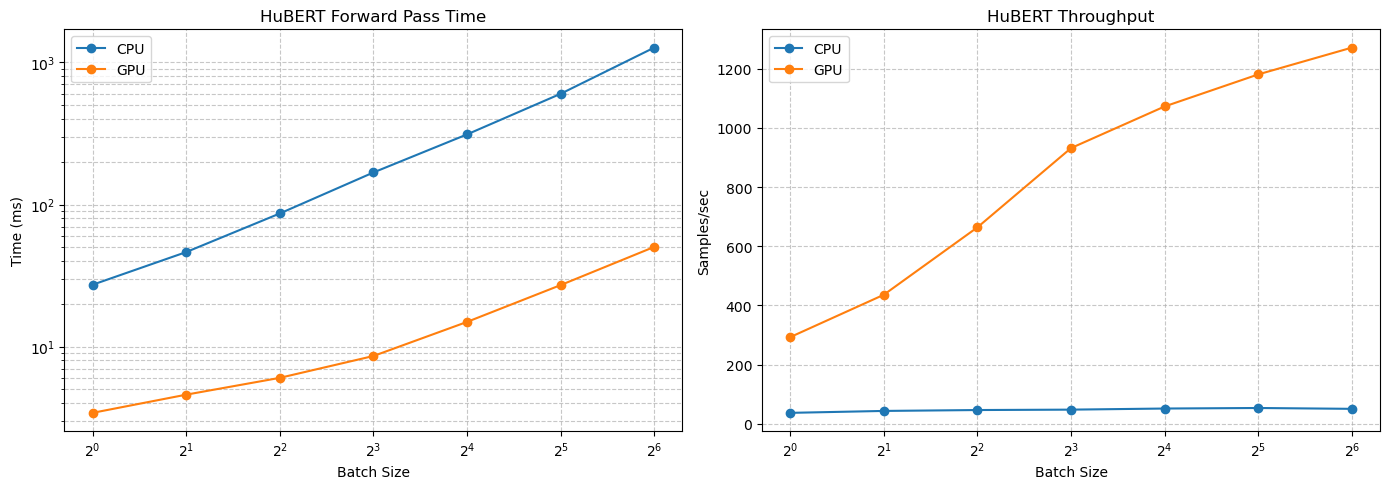

In [14]:
from transformers import HubertModel
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

# reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load model
model_name = "facebook/hubert-base-ls960"
model = HubertModel.from_pretrained(model_name, use_safetensors=True)

# test batch sizes
batch_sizes = [1, 2, 4, 8, 16,32,64]
sampling_rate = 16000
duration_sec = 1
n_samples = sampling_rate * duration_sec

n_repeat = 5  # repeat for stability

cpu_times = []
gpu_times = []

# Warm up GPU
device_gpu = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device_gpu)
dummy = torch.randn(1, n_samples).to(device_gpu)
with torch.no_grad():
    for _ in range(5):
        _ = model(dummy)

# Benchmark
for bs in batch_sizes:
    cpu_batch_times = []
    gpu_batch_times = []

    waveform = torch.randn(bs, n_samples)

    # CPU
    model.to("cpu")
    for _ in range(n_repeat):
        with torch.no_grad():
            start = time.time()
            _ = model(waveform.to("cpu"))
            end = time.time()
            cpu_batch_times.append((end - start) * 1000)
    cpu_times.append(np.mean(cpu_batch_times))

    # GPU
    if torch.cuda.is_available():
        model.to(device_gpu)
        for _ in range(n_repeat):
            with torch.no_grad():
                waveform_gpu = waveform.to(device_gpu)
                torch.cuda.synchronize()
                start = time.time()
                _ = model(waveform_gpu)
                torch.cuda.synchronize()
                end = time.time()
                gpu_batch_times.append((end - start) * 1000)
        gpu_times.append(np.mean(gpu_batch_times))
    else:
        gpu_times.append(np.nan)

# Throughput
cpu_throughput = np.array(batch_sizes) / (np.array(cpu_times) / 1000)
gpu_throughput = np.array(batch_sizes) / (np.array(gpu_times) / 1000)

# Print summary
print(f"\n{'Batch Size':>10} {'CPU (ms)':>10} {'GPU (ms)':>10} {'CPU (samples/s)':>18} {'GPU (samples/s)':>18}")
for i, bs in enumerate(batch_sizes):
    print(f"{bs:>10} {cpu_times[i]:>10.2f} {gpu_times[i]:>10.2f} {cpu_throughput[i]:>18.2f} {gpu_throughput[i]:>18.2f}")

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# forward pass time
ax[0].plot(batch_sizes, cpu_times, label="CPU", marker="o")
ax[0].plot(batch_sizes, gpu_times, label="GPU", marker="o")
ax[0].set_title("HuBERT Forward Pass Time")
ax[0].set_xlabel("Batch Size")
ax[0].set_ylabel("Time (ms)")
ax[0].legend()
ax[0].set_xscale("log", base=2)
ax[0].set_yscale("log")
ax[0].grid(True, which="both", linestyle="--", alpha=0.7)

# throughput
ax[1].plot(batch_sizes, cpu_throughput, label="CPU", marker="o")
ax[1].plot(batch_sizes, gpu_throughput, label="GPU", marker="o")
ax[1].set_title("HuBERT Throughput")
ax[1].set_xlabel("Batch Size")
ax[1].set_ylabel("Samples/sec")
ax[1].legend()
ax[1].set_xscale("log", base=2)
ax[1].grid(True, which="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()



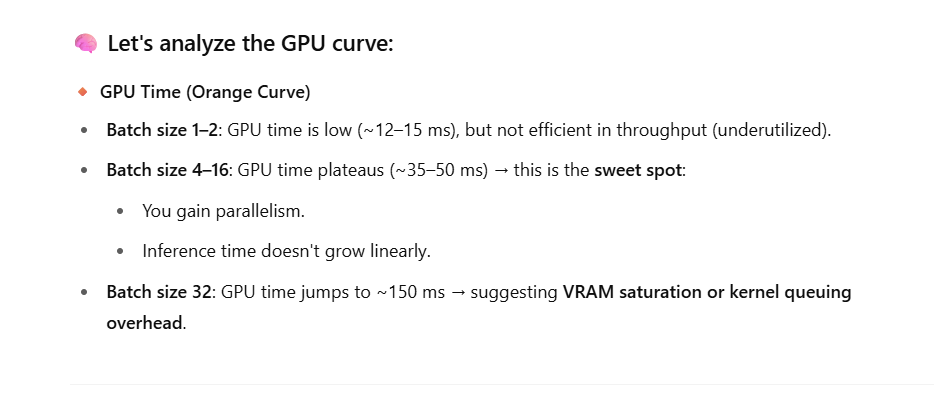
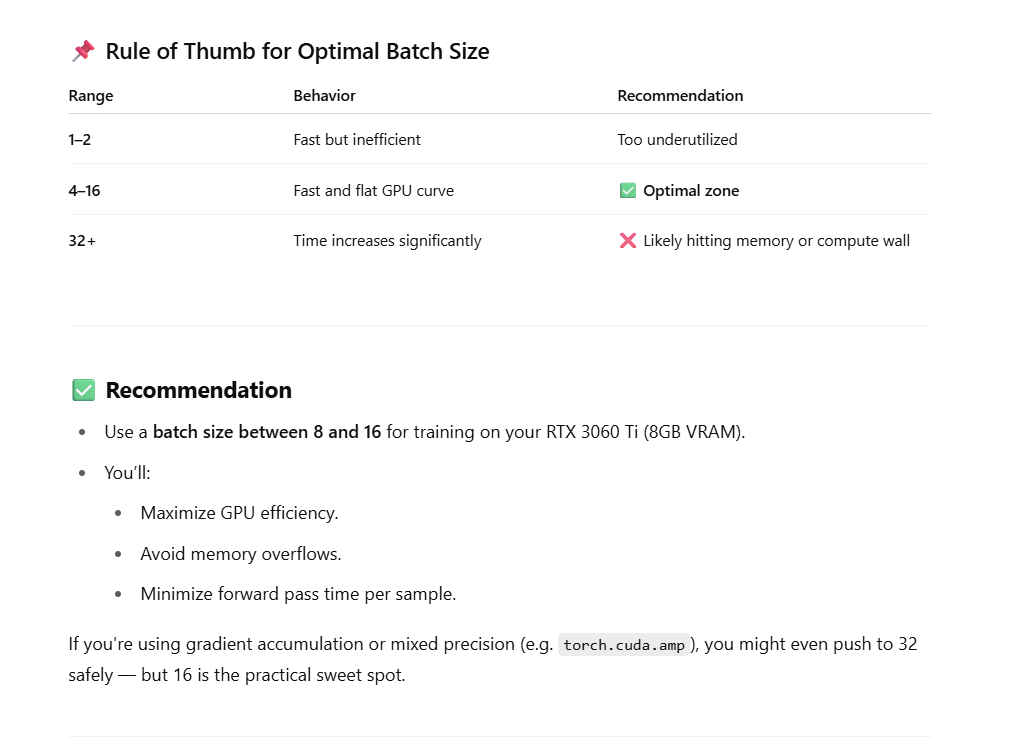

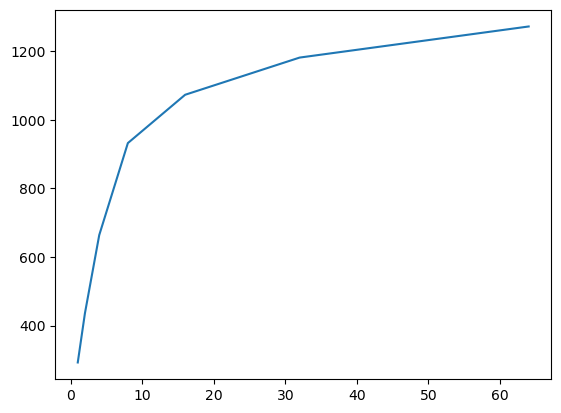

In [15]:
throughput = [batch_size / (batch_time / 1000) for batch_size, batch_time in zip(batch_sizes, gpu_times)]
plt.plot(batch_sizes, throughput, label="GPU Throughput (samples/sec)")
